In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pyarrow.feather as feather

In [4]:
input_root_path = "P:\SALMALIS Lab\Work Zone Dataset"

In [5]:
df = feather.read_feather(os.path.join(input_root_path, 'TravelTime_Valid_Recom_Weather_Traffic.ftr'))
# df['AssetNumber'] = df['AssetNumber'].astype(float)
print(df.nunique())
# df.set_index('AssetNumber', inplace=True)
df

AssetNumber                   423
AssetIdentifier               256
CreatedDate                546359
UnderConstructionTime         608
BaselineTime                  289
DelayTime                     665
State                           2
SegmentLength                 183
TravelDirect                    2
Spread                          7
TrafficImpact                   3
RoadType                        3
TrafficControlSetup             3
CreatedDate:Date              194
CreatedDate:Weekday             7
CreatedDate:DayOfYear         123
CreatedDate:Year                2
CreatedDate:Month               5
CreatedDate:Day                31
CreatedDate:Hour               24
CreatedDate:MinuteInDay      1440
CreatedDate:Season              3
Weather:StationID              12
Weather:Long                   11
Weather:Lat                    12
Weather:Temp                  382
Weather:Precip                 46
Weather:WindSpd                39
Traffic:SiteNo                 17
Traffic:IsTemp

,AssetNumber,AssetIdentifier,CreatedDate,UnderConstructionTime,BaselineTime,DelayTime,State,SegmentLength,TravelDirect,Spread,...,Weather:Lat,Weather:Temp,Weather:Precip,Weather:WindSpd,Traffic:SiteNo,Traffic:IsTemporary,Traffic:AADT,Traffic:BaseYear,Traffic:CalculatedAADT,MaxSpeed
0,49831911074,Spread 3B,2022-05-03 17:59:55,2.20,2.13,0.07,OK,3.36,SB,Spread 3B,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
1,49831911074,Spread 3B,2022-05-03 17:57:32,2.20,2.13,0.07,OK,3.36,SB,Spread 3B,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
2,49831911074,Spread 3B,2022-05-03 17:55:23,2.20,2.13,0.07,OK,3.36,SB,Spread 3B,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
3,49831911074,Spread 3B,2022-05-03 17:53:29,2.20,2.13,0.07,OK,3.36,SB,Spread 3B,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
4,49831911074,Spread 3B,2022-05-03 17:51:45,2.23,2.13,0.10,OK,3.36,SB,Spread 3B,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816070,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:40:12,1.38,1.48,0.00,OK,2.45,NB,Spread 5B,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN
2816071,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:45:11,1.38,1.48,0.00,OK,2.45,NB,Spread 5B,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN
2816072,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:50:10,1.38,1.48,0.00,OK,2.45,NB,Spread 5B,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN
2816073,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:51:07,1.37,1.48,0.00,OK,2.45,NB,Spread 5B,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN


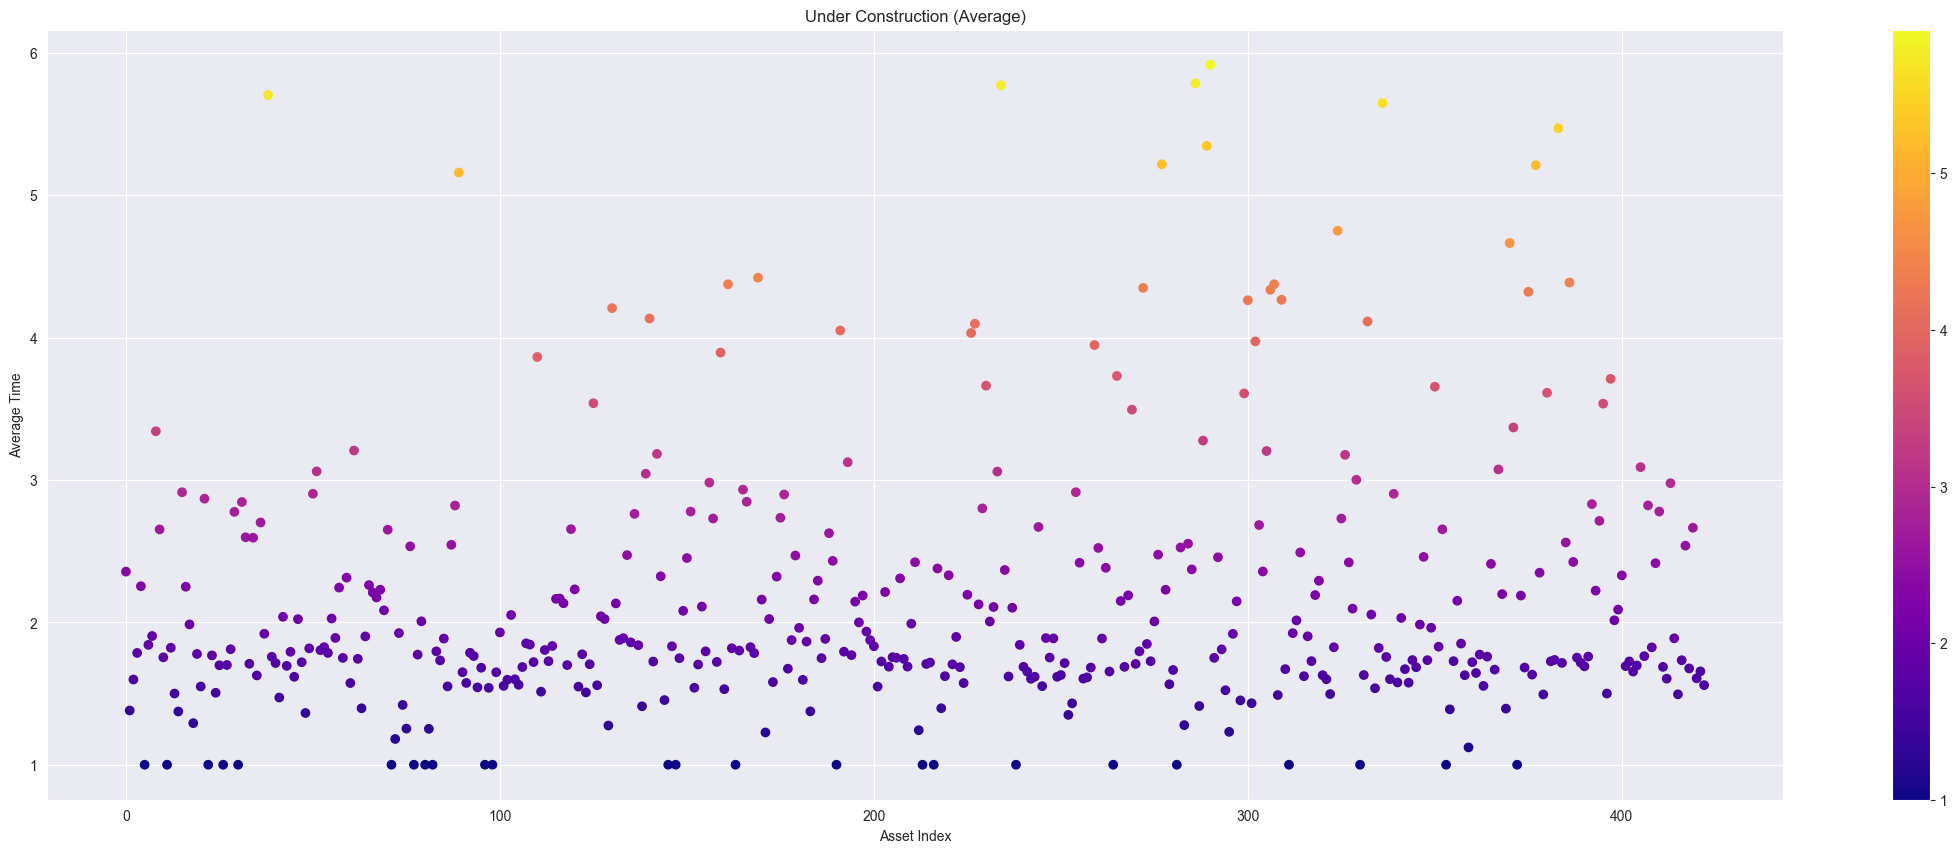

In [6]:
underconst_df = df.groupby('AssetNumber')['UnderConstructionTime'].mean().reset_index().reset_index()
fig, ax = plt.subplots(figsize=(28,10))
# ax.ticklabel_format(useOffset=False, style='plain')
plt.scatter(underconst_df['index'], underconst_df['UnderConstructionTime'], c=list(underconst_df['UnderConstructionTime']), cmap='plasma')
plt.title('Under Construction (Average)')
plt.ylabel('Average Time')
plt.xlabel('Asset Index')
plt.colorbar()


# # plt.figure(figsize=(28,10))
# temp = df.groupby('AssetNumber')['UnderConstructionTime'].mean().to_dict()
# fig, ax = plt.subplots(figsize=(28,10))
# ax.ticklabel_format(useOffset=False, style='plain')
# plt.scatter(temp.keys(), temp.values(), c=list(temp.values()), cmap='plasma')
# plt.title('Under Construction (Average)')
# plt.ylabel('Average Time')
# plt.xlabel('Asset Number')
# plt.colorbar()

<AxesSubplot: title={'center': 'UnderConstruction Time (Average)'}, xlabel='index'>

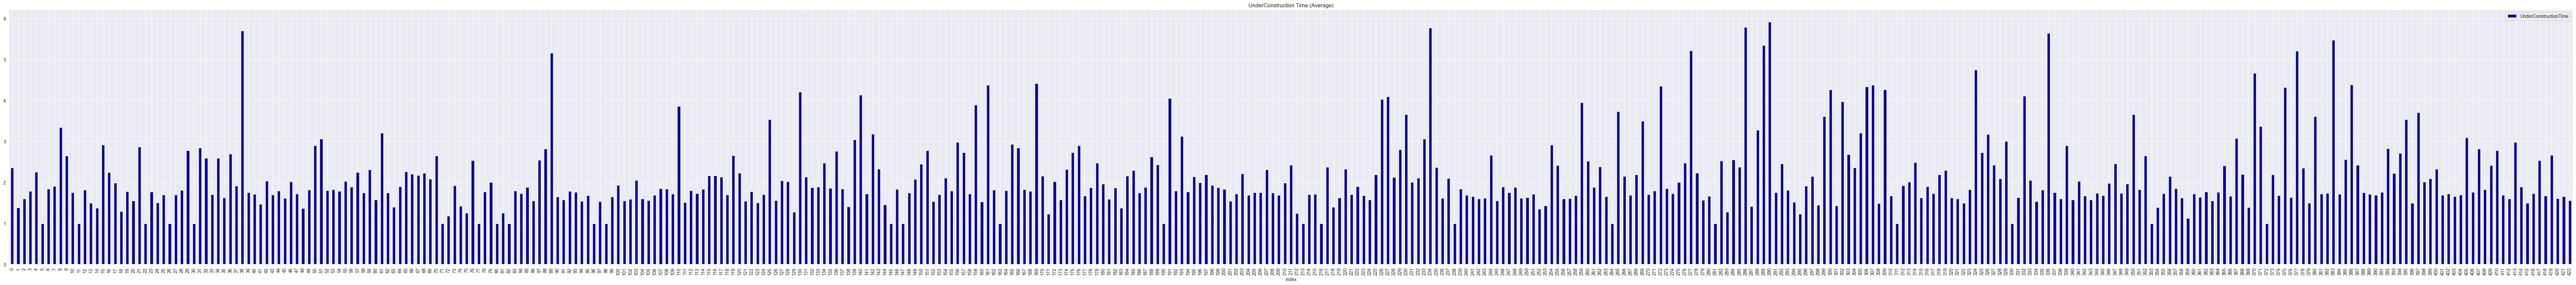

In [21]:
underconst_df.plot.bar(x="index", y="UnderConstructionTime", colormap='plasma', figsize = (100,10), title='UnderConstruction Time (Average)')

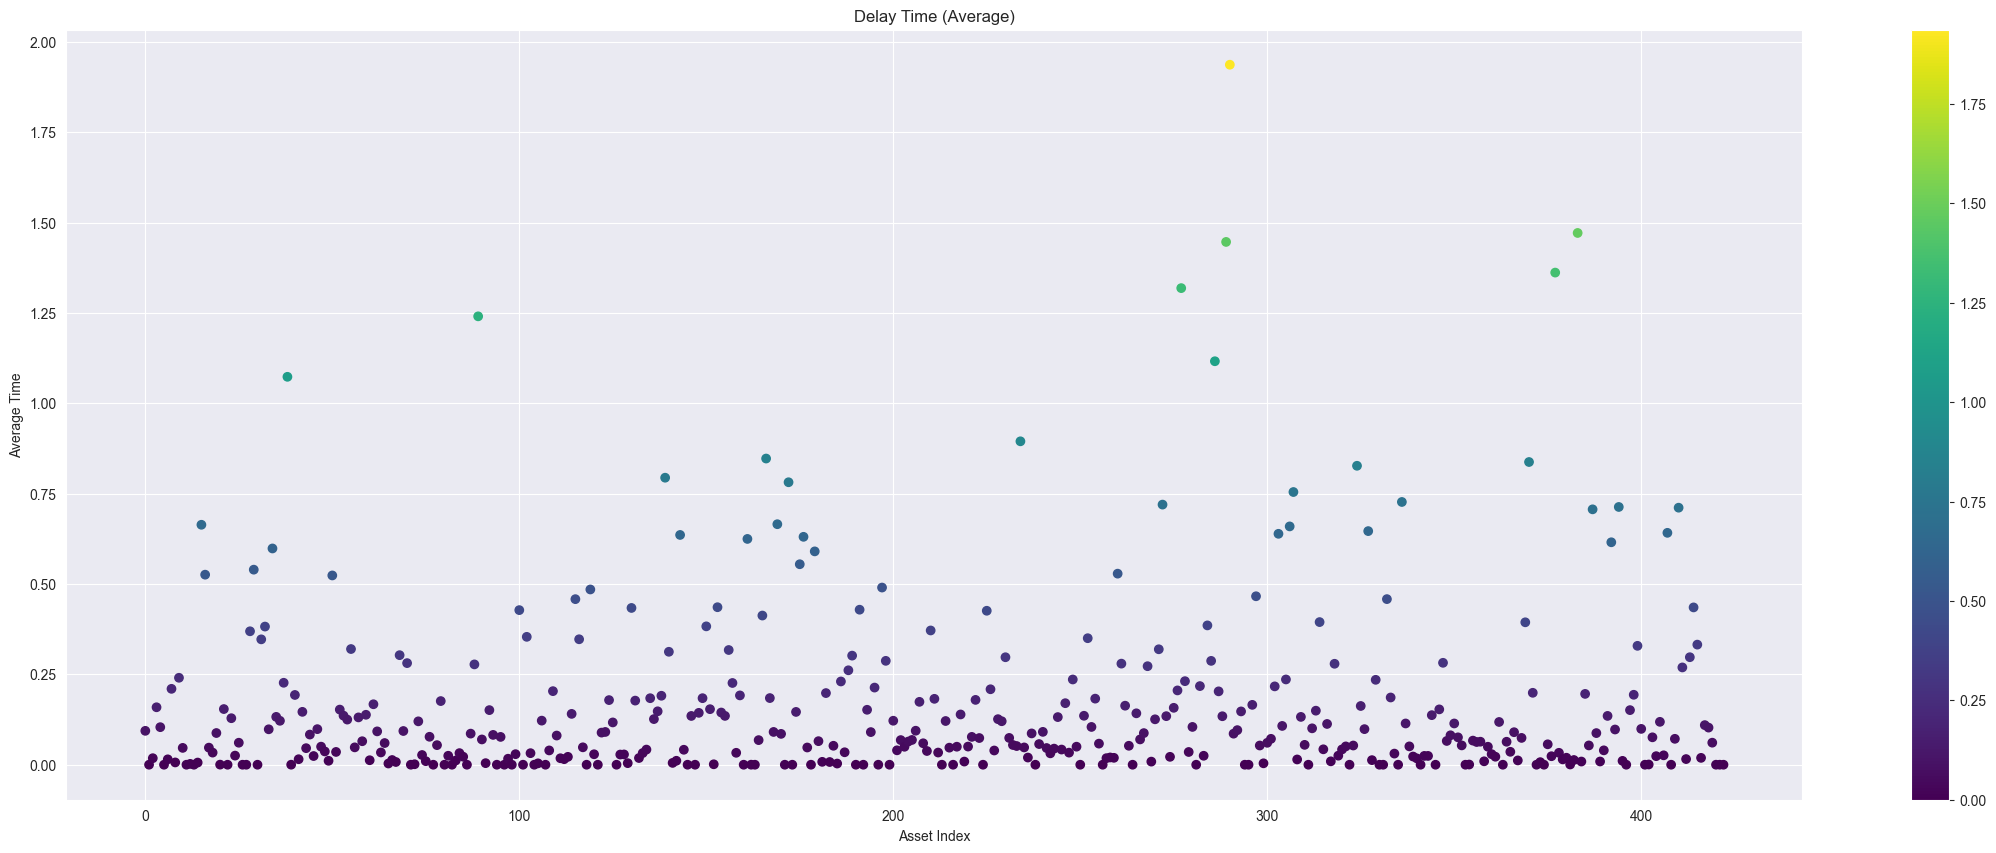

In [44]:
# plt.figure(figsize=(28,10))
delay_df = df.groupby('AssetNumber')['DelayTime'].mean().reset_index().reset_index()
fig, ax = plt.subplots(figsize=(28,10))
ax.ticklabel_format(useOffset=False, style='plain')
plt.scatter(delay_df['index'], delay_df['DelayTime'], c=list(delay_df['DelayTime']), cmap='viridis')
plt.title('Delay Time (Average)')
plt.ylabel('Average Time')
plt.xlabel('Asset Index')
plt.colorbar()

<AxesSubplot: title={'center': 'Delay Time (Average)'}, xlabel='index'>

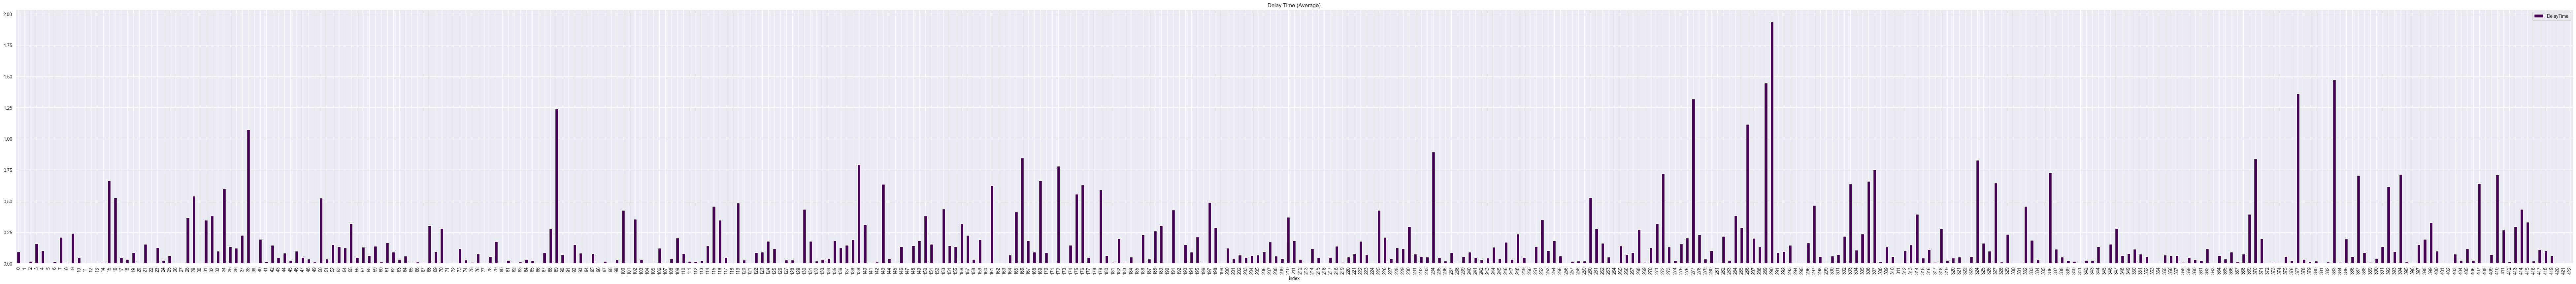

In [20]:
delay_df.plot.bar(x="index", y="DelayTime", colormap='viridis', figsize = (100,10), title='Delay Time (Average)')


<AxesSubplot: title={'center': 'Delay and Under Construction Time (Average)'}, xlabel='index'>

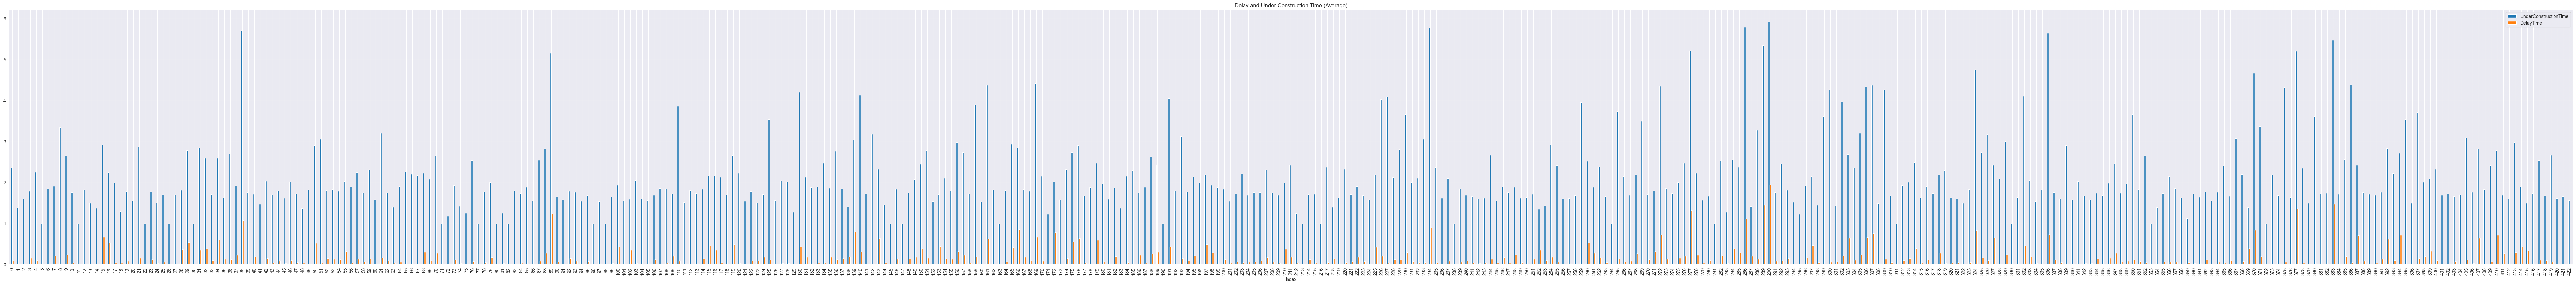

In [41]:
df_time = pd.merge(left=underconst_df[['AssetNumber', 'UnderConstructionTime']], right=delay_df[['AssetNumber', 'DelayTime']], on='AssetNumber').reset_index()
df_time.plot.bar(x='index', y=['UnderConstructionTime', 'DelayTime'], figsize = (100,10), title='Delay and Under Construction Time (Average)')

<AxesSubplot: title={'center': 'Under Construction Time (All Records)'}, xlabel='index', ylabel='UnderConstructionTime'>

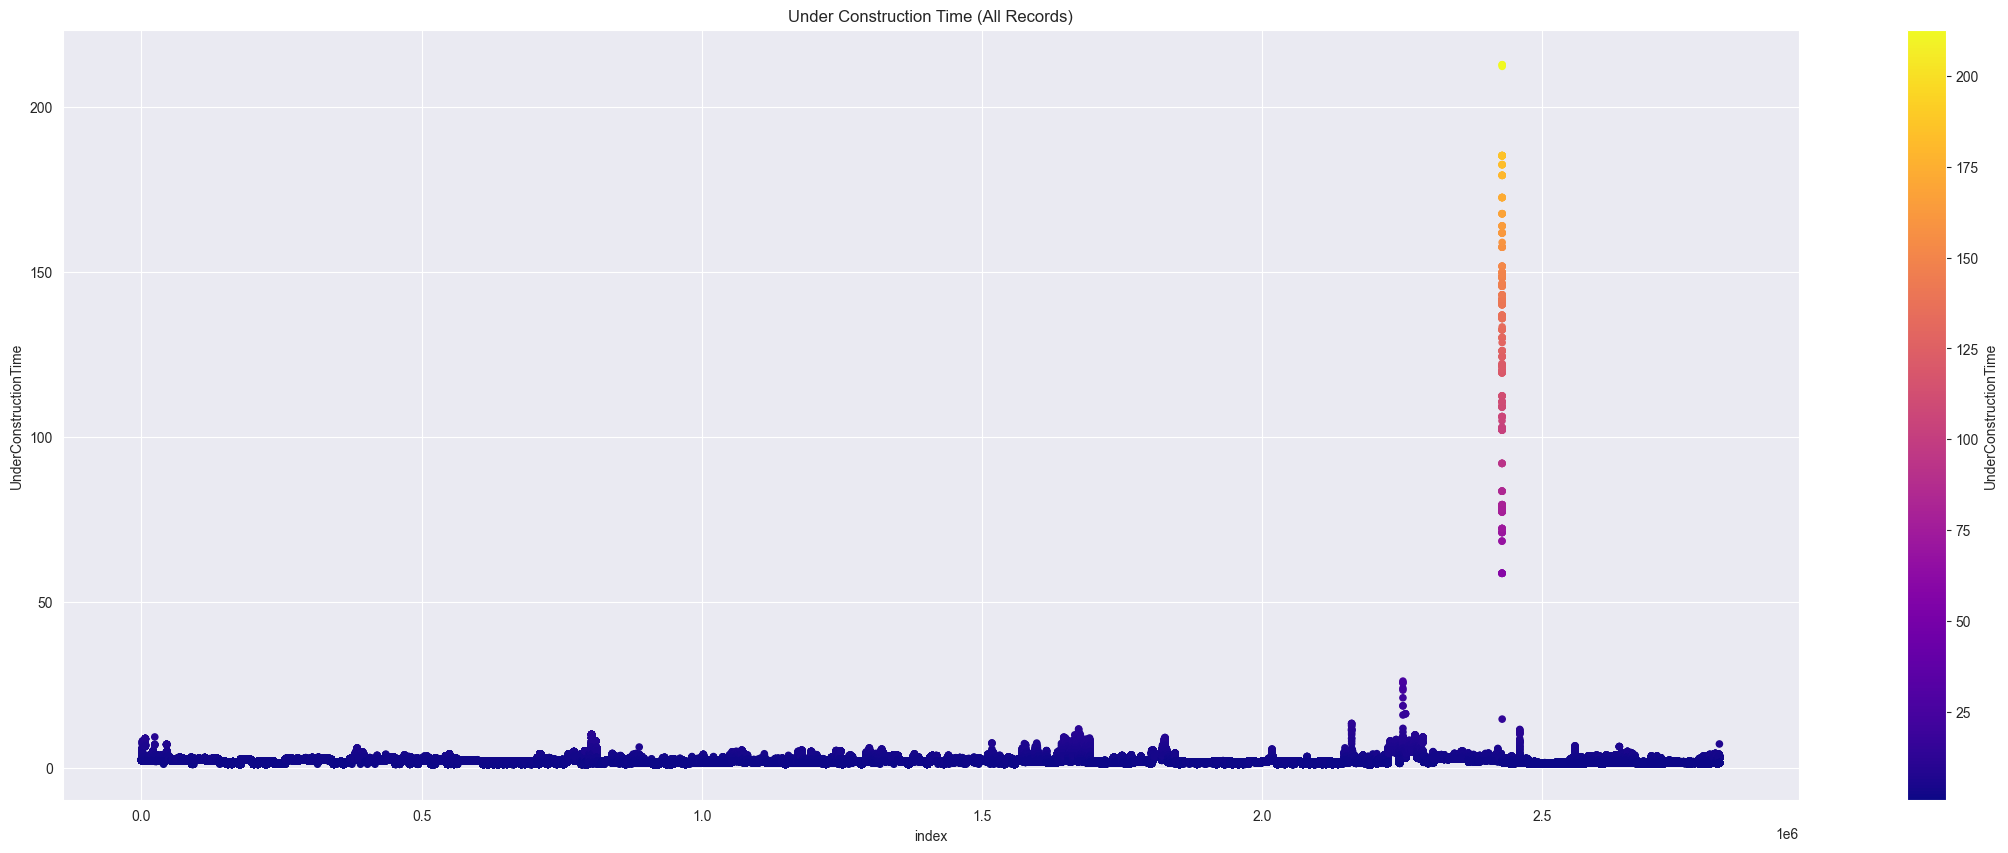

In [51]:
df.reset_index().plot.scatter(x="index", y="UnderConstructionTime", c="UnderConstructionTime", colormap='plasma', figsize = (28,10), title='Under Construction Time (All Records)')
# ax1 = plt.subplot()
# plt.xticks(df.index)
# plt.yticks(y)
# .groupby('AssetNumber')['UnderConstructionTime'].mean()

<AxesSubplot: title={'center': 'Delay Time (All Records)'}, xlabel='index', ylabel='DelayTime'>

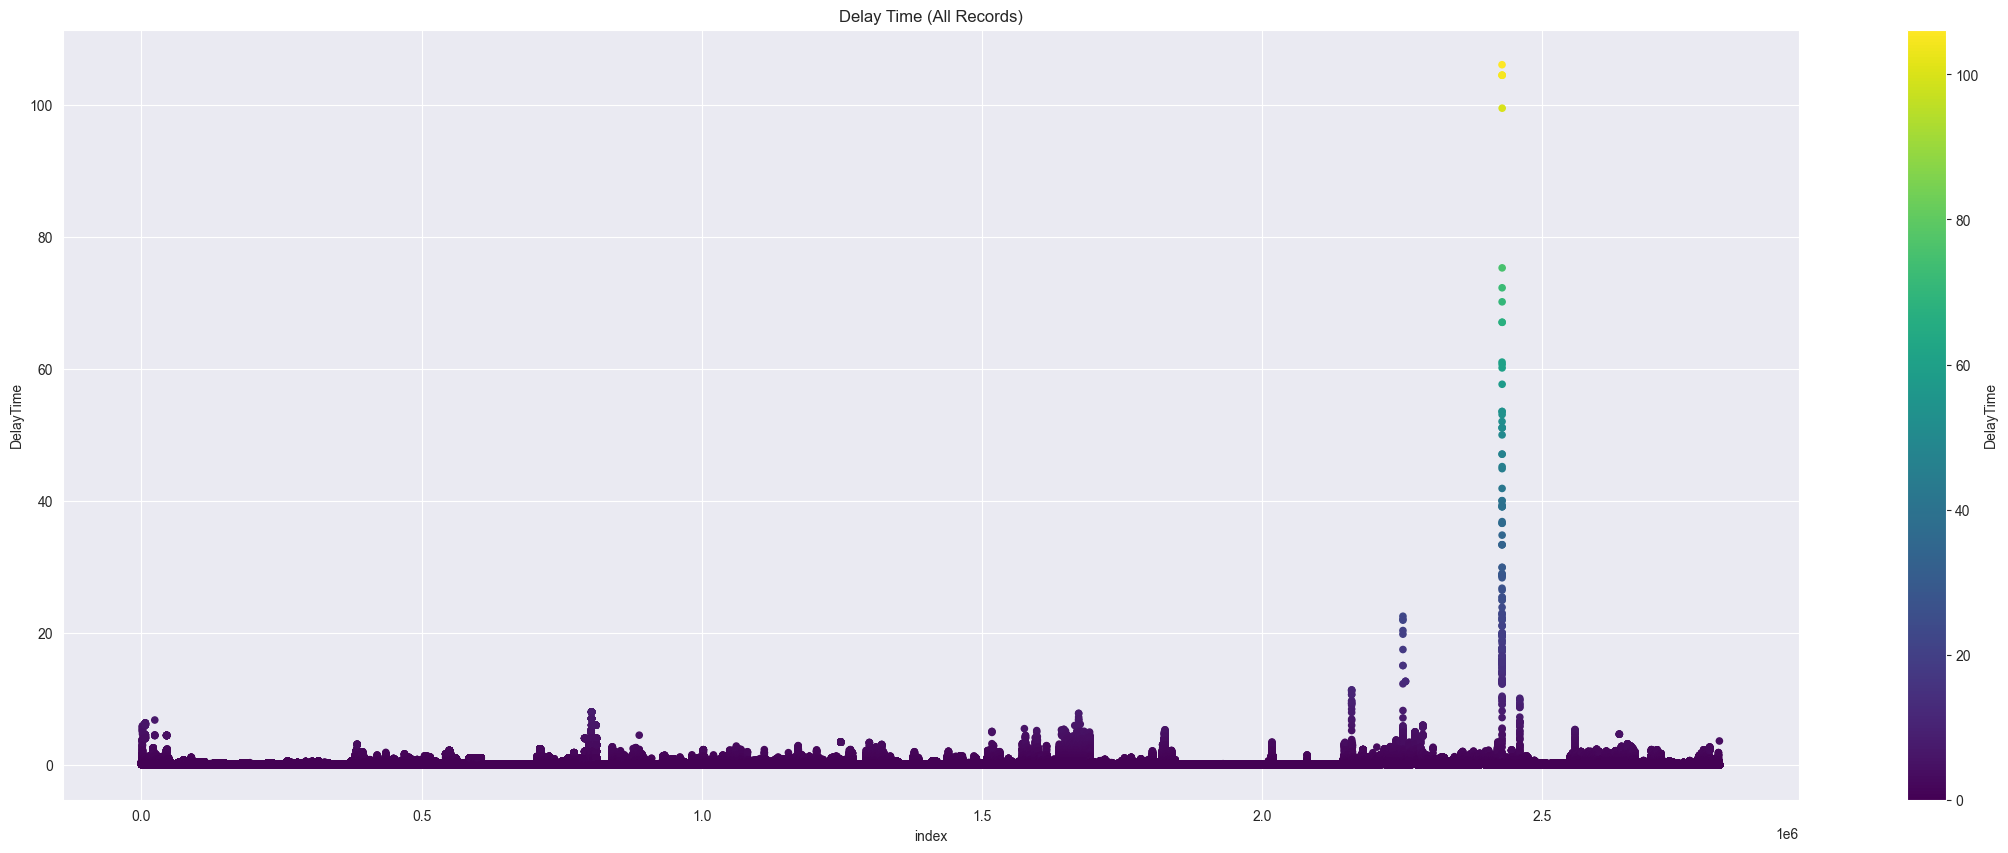

In [52]:
df.reset_index().plot.scatter(x="index", y="DelayTime", c="DelayTime", colormap='viridis', figsize = (28,10), title='Delay Time (All Records)')

In [53]:
# df.groupby('AssetNumber')['UnderConstructionTime'].plot.box()

In [54]:
# # fig, ax = plt.subplots(figsize=(28,8))
# df.groupby('AssetNumber')['UnderConstructionTime'].mean().plot(figsize = (28,10))
# # plt.xticks(df['AssetNumber'])
# # ax.set_xticks(xticks, minor=True)
# # plt.show()

In [55]:
# df.groupby('AssetNumber')['DelayTime'].mean().plot(figsize = (28,10))
# # plt.xticks(df.index)
# plt.show()

<AxesSubplot: title={'center': 'Under Construction Time (All Records Under 50)'}, xlabel='index', ylabel='UnderConstructionTime'>

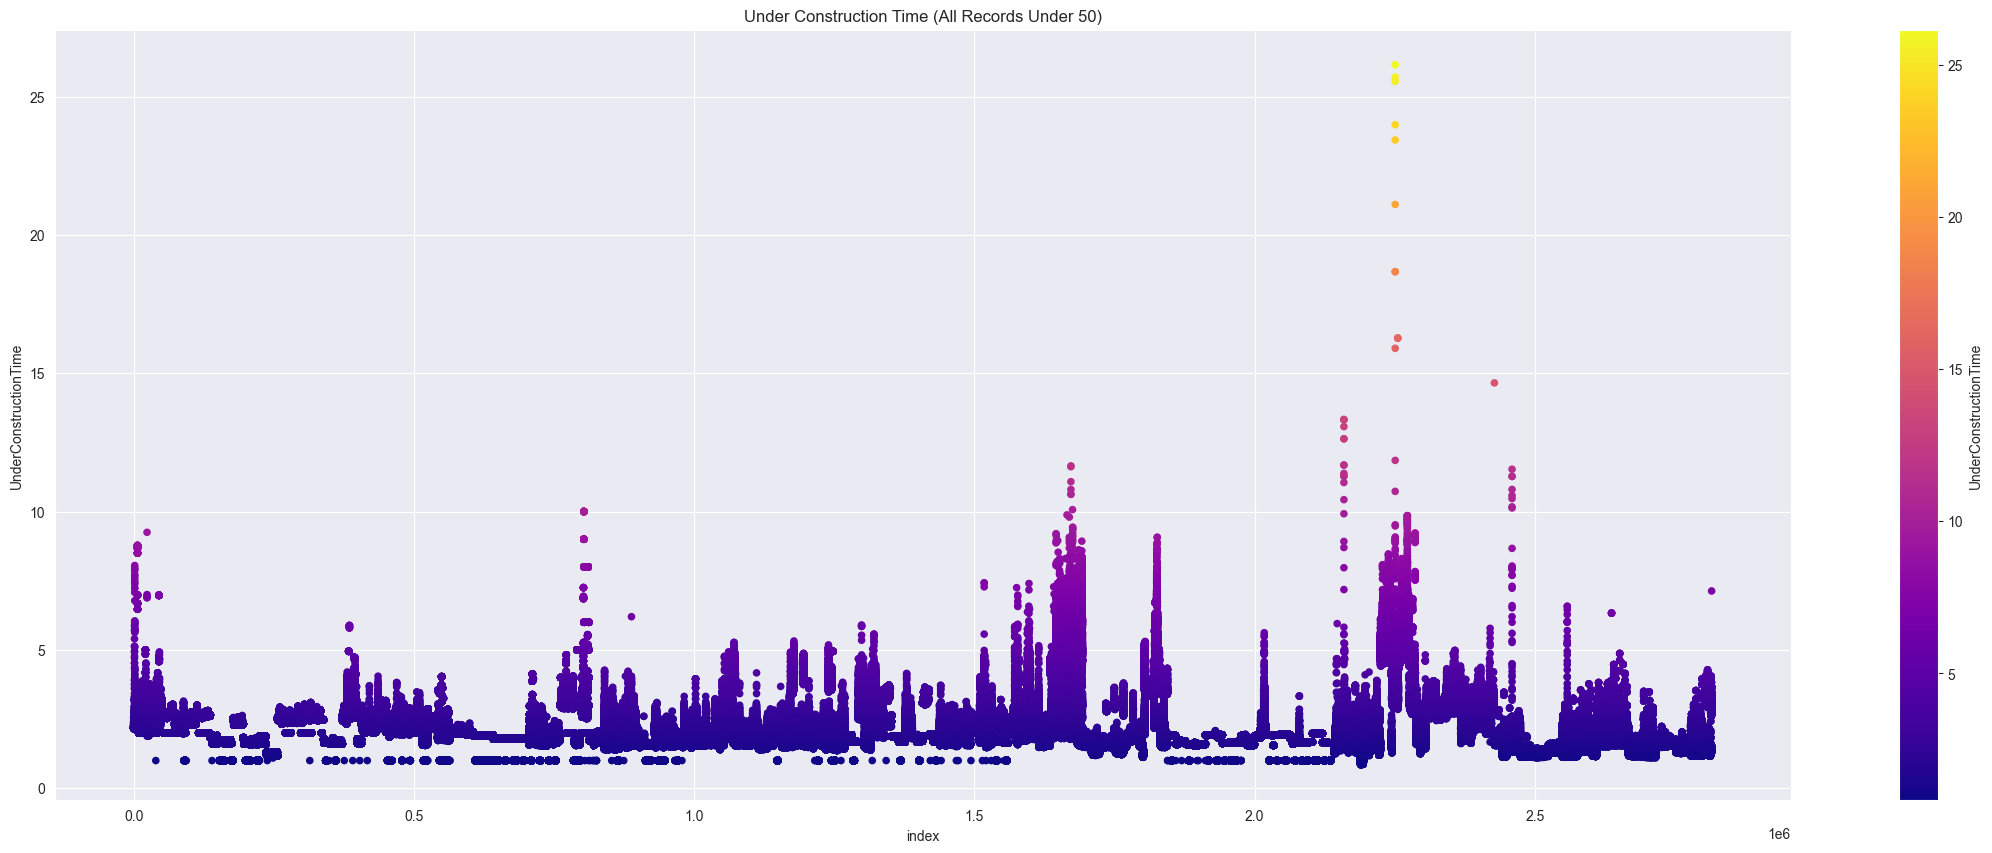

In [56]:
df_50 = df[(df['UnderConstructionTime'] < 50)].reset_index()
df_50.plot.scatter(x="index", y="UnderConstructionTime", c="UnderConstructionTime", colormap='plasma', figsize = (28,10), title='Under Construction Time (All Records Under 50)')

<AxesSubplot: title={'center': 'Delay Time (All Records Under 50)'}, xlabel='index', ylabel='DelayTime'>

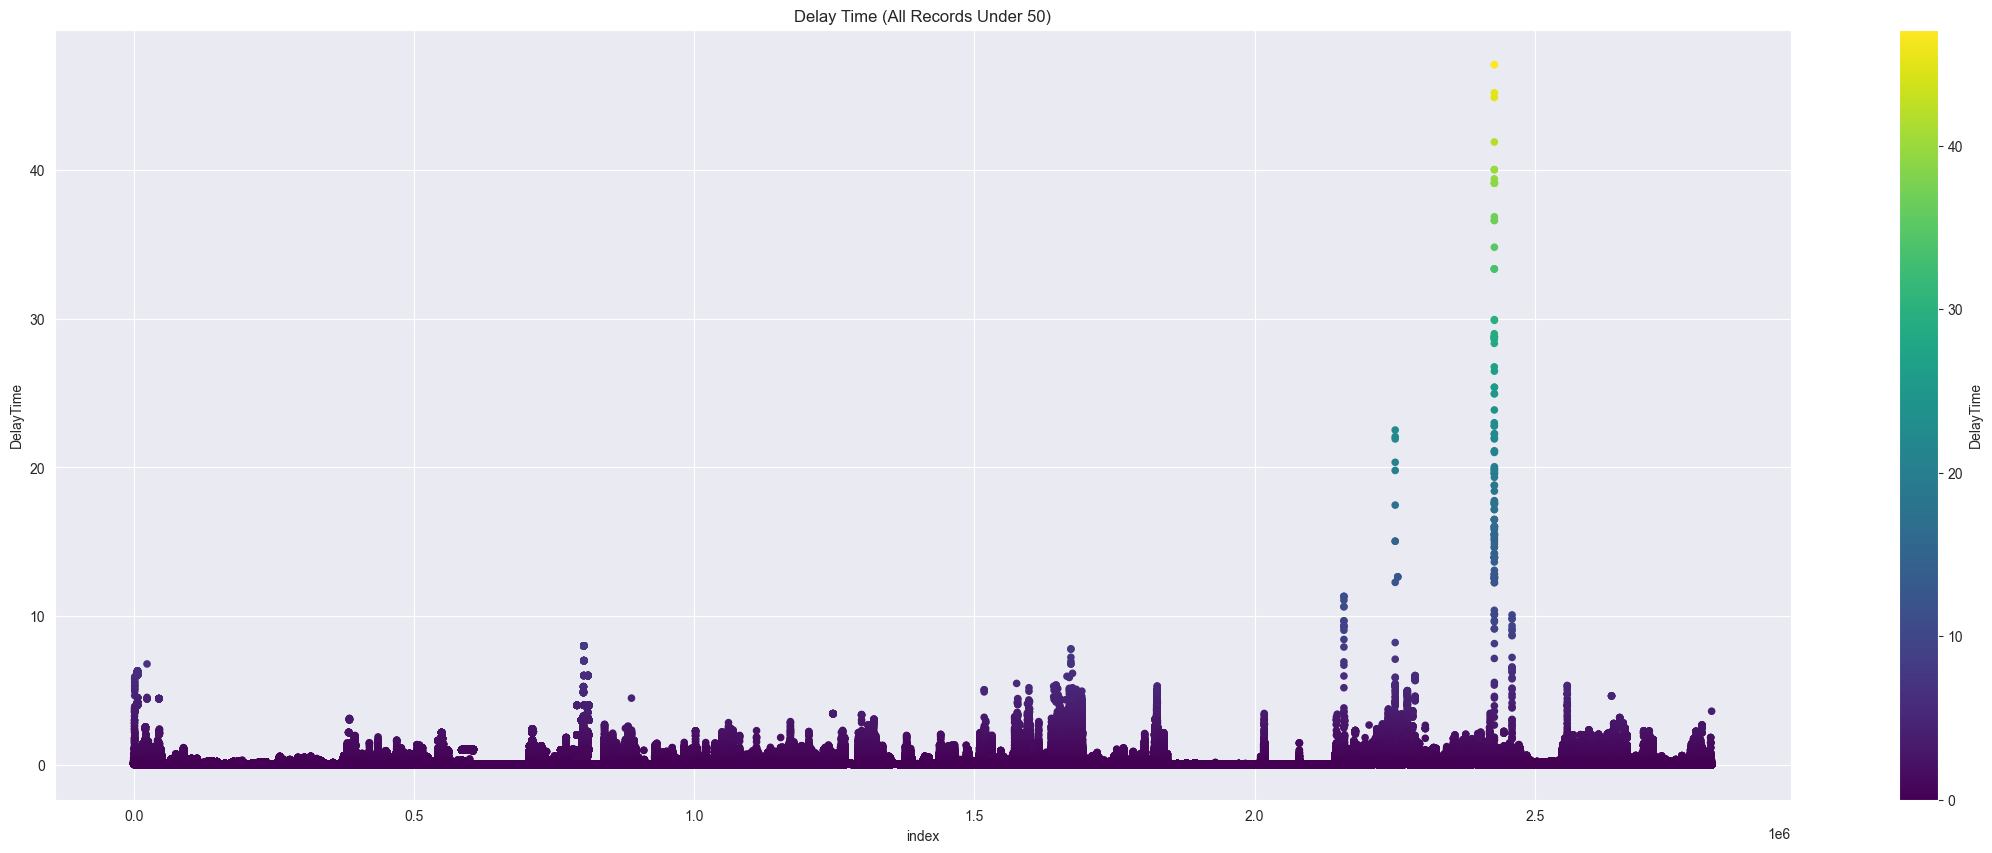

In [57]:
df_Delay50 = df[(df['DelayTime'] < 50)].reset_index()
df_Delay50.plot.scatter(x="index", y="DelayTime", c="DelayTime", colormap='viridis', figsize = (28,10), title='Delay Time (All Records Under 50)')

In [59]:
df_Delay50

,index,AssetNumber,AssetIdentifier,CreatedDate,UnderConstructionTime,BaselineTime,DelayTime,State,SegmentLength,TravelDirect,...,Weather:Lat,Weather:Temp,Weather:Precip,Weather:WindSpd,Traffic:SiteNo,Traffic:IsTemporary,Traffic:AADT,Traffic:BaseYear,Traffic:CalculatedAADT,MaxSpeed
0,0,49831911074,Spread 3B,2022-05-03 17:59:55,2.20,2.13,0.07,OK,3.36,SB,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
1,1,49831911074,Spread 3B,2022-05-03 17:57:32,2.20,2.13,0.07,OK,3.36,SB,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
2,2,49831911074,Spread 3B,2022-05-03 17:55:23,2.20,2.13,0.07,OK,3.36,SB,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
3,3,49831911074,Spread 3B,2022-05-03 17:53:29,2.20,2.13,0.07,OK,3.36,SB,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
4,4,49831911074,Spread 3B,2022-05-03 17:51:45,2.23,2.13,0.10,OK,3.36,SB,...,52.72,NaN,NaN,NaN,23-010NS,True,355.333333,2017.0,373.10,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816013,2816070,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:40:12,1.38,1.48,0.00,OK,2.45,NB,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN
2816014,2816071,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:45:11,1.38,1.48,0.00,OK,2.45,NB,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN
2816015,2816072,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:50:10,1.38,1.48,0.00,OK,2.45,NB,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN
2816016,2816073,86704972236,AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6,2021-05-01 18:51:07,1.37,1.48,0.00,OK,2.45,NB,...,49.24,14.2,0.0,6.0,17-015W,True,617.333333,2013.0,666.72,NaN


In [58]:
# sns.scatterplot(x=df.index, y=df.DelayTime.mean(), data=df)
# # plt.xticks(df.index)
# plt.show()